In [1]:
# ANALISANDO OS DADOS POR MEIO DO PYTHON
# Antes eu passaria esses diretamente pelo software de visualização
# Porém creio agora que é mais facil fazer pelo python


In [88]:
# instalando a matplotlib para visualização
!pip install -U matplotlib
!pip install -U seaborn
# caso a visualização fosse ser criada no python eu instalaria seaborn


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 288.2/288.2 kB 3.0 MB/s eta 0:00:00


In [18]:
# IMPORTANDO AS BIBLIOTECAS NECESSARIAS
import matplotlib.pyplot as plt
import pandas as pd
import 

In [29]:
# CARREGANDO O CSV QUE SERA ANALISADO
coffeeDF = pd.read_csv('data/coffe_etl.csv')
coffeeDF.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,False,False
1,C,Коферум,Cafe,5.0,24.0,$$,False,False,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


In [30]:
# DESCOBRINDO OS "RANGES" DAS COLUNAS NUMERICOS
print(coffeeDF['Rating'].min(),
      coffeeDF['Rating'].max())
# Dava pra descobrir o max e min porém não me atentei no enunciado

3.9 5.0


In [31]:
# PRINCIPAL FUNÇÃO NA ANALISE INICIAL
coffeeDF.describe()

,Rating,Reviews
count,198.000000,198.000000
mean,4.663636,622.494949
std,0.221648,1400.898666
min,3.900000,3.000000
25%,4.600000,47.500000
50%,4.700000,271.500000
75%,4.800000,786.250000
max,5.000000,17937.000000


(array([ 4.,  2.,  2.,  6., 12., 22., 47., 39., 18., 46.]),
 array([3.9 , 4.01, 4.12, 4.23, 4.34, 4.45, 4.56, 4.67, 4.78, 4.89, 5.  ]),
 <BarContainer object of 10 artists>)

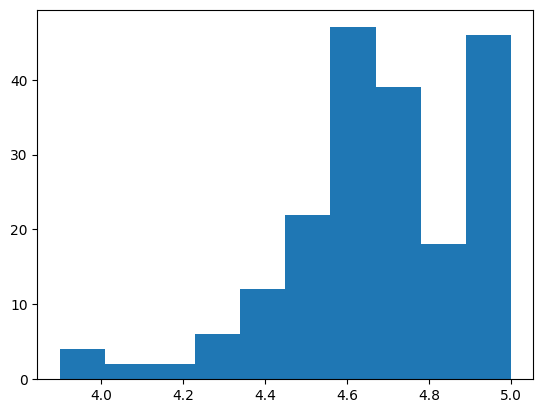

In [62]:
plt.hist(coffeeDF['Rating'])

In [32]:
''' Vamos fazer algumas agrupações para tirar algumas ideias de insight
        1 Os nomes dos restaurantes são unicos?
        2 O preço está correlacionado com a avaliação?
        3 Qual o melhor restaurante em nota?    
'''

' Vamos fazer algumas agrupações para tirar algumas ideias de insight\n        * Primeiro precisamos normalizar a avaliação\n        * Para ponderar a nota pelo numero de avaliações\n        * Ai sim poderemos ter correlações justas\n        \n        1 Os nomes dos restaurantes são unicos?\n        2 O preço está correlacionado com a avaliação?\n        3 Qual o melhor restaurante em nota?    \n'

C:\Users\lucad\AppData\Local\Temp\ipykernel_47544\3428566404.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coffeeDF.groupby('Place type').mean()['Rating'].plot(kind='bar')


<AxesSubplot: xlabel='Place type'>

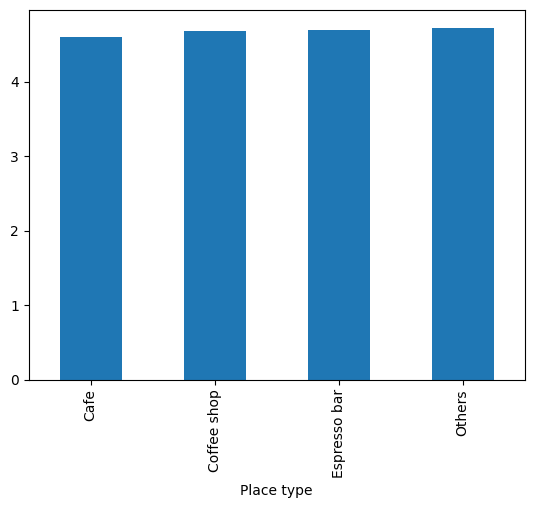

In [73]:
coffeeDF.groupby('Place type').mean()['Rating'].plot(kind='bar')


<AxesSubplot: xlabel='Place type'>

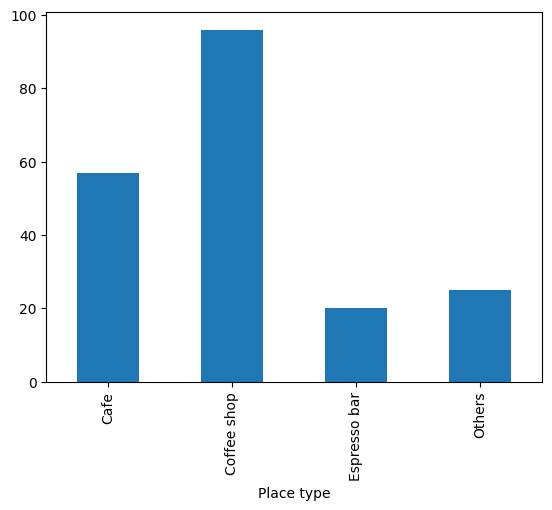

In [70]:
coffeeDF.groupby('Place type')['Place type'].count().plot(kind='bar')

C:\Users\lucad\AppData\Local\Temp\ipykernel_47544\3310939316.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_reviews = coffeeDF.groupby('Place name').sum()['Reviews'].sort_values(ascending=False)[:10]


<AxesSubplot: xlabel='Place name'>

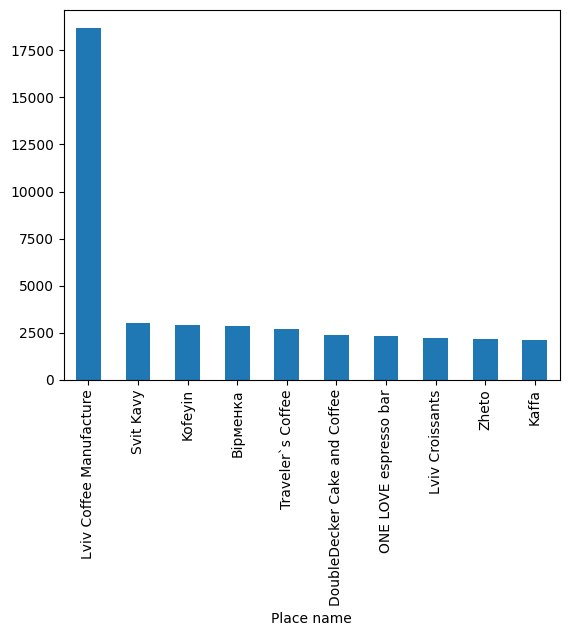

In [83]:
# Buscando a loja melhor avaliada TOP 10
top_reviews = coffeeDF.groupby('Place name').sum()['Reviews'].sort_values(ascending=False)[:10]
top_reviews.plot(kind='bar')

C:\Users\lucad\AppData\Local\Temp\ipykernel_47544\797512046.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coffeeDF[coffeeDF['Place name'].isin(top_reviews.index)].groupby('Place type').mean()['Rating'].plot(kind='bar')


<AxesSubplot: xlabel='Place type'>

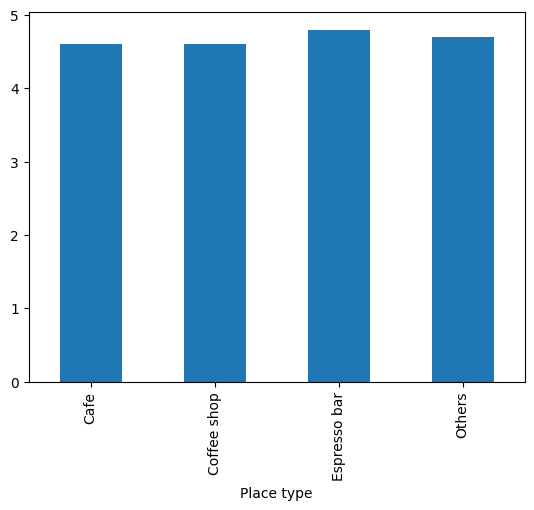

In [87]:
coffeeDF[coffeeDF['Place name'].isin(top_reviews.index)].groupby('Place type').mean()['Rating'].plot(kind='bar')